# Importing necessary libraries

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

# Image data augumentation

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# loading our data and performing data augumentation

In [20]:
train_set = train_datagen.flow_from_directory('../data/train_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 316 images belonging to 3 classes.


In [29]:
test_set = test_datagen.flow_from_directory('../data/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 120 images belonging to 3 classes.


In [30]:
print(train_set.class_indices)

{'crack': 0, 'flakes': 1, 'roof': 2}


In [31]:
from collections import Counter as c
c(training_set .labels)

Counter({0: 86, 1: 176, 2: 54})

# Resizing the images

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'data/train_set'
valid_path = 'data/test_set'

# pre-trained  CNN  model as a feature extractor

In [3]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
58892288/58889256 [==============================] - 49s 1us/step


In [4]:
for layer in vgg16.layers:
    layer.trainable = False

In [5]:
folders=glob('../dataset/train_set/*')

In [6]:
folders

['../dataset/train_set\\crack',
 '../dataset/train_set\\flakes',
 '../dataset/train_set\\roof']

In [7]:
x = Flatten()(vgg16.output)

# Adding Dense layers

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg16.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# compile the model

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Train the model

In [21]:
r = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

Epoch 1/10
10/10 [==============================] - 470s 47s/step - loss: 1.0855 - acc: 0.5411 - val_loss: 0.9326 - val_acc: 0.7000
Epoch 2/10
10/10 [==============================] - 460s 46s/step - loss: 0.5797 - acc: 0.7785 - val_loss: 0.6061 - val_acc: 0.7750
Epoch 3/10
10/10 [==============================] - 428s 43s/step - loss: 0.3939 - acc: 0.8323 - val_loss: 0.7404 - val_acc: 0.7250
Epoch 4/10
10/10 [==============================] - 451s 45s/step - loss: 0.3080 - acc: 0.8797 - val_loss: 0.6741 - val_acc: 0.7417
Epoch 5/10
10/10 [==============================] - 444s 44s/step - loss: 0.1954 - acc: 0.9335 - val_loss: 0.6388 - val_acc: 0.7667
Epoch 6/10
10/10 [==============================] - 431s 43s/step - loss: 0.1642 - acc: 0.9620 - val_loss: 0.5742 - val_acc: 0.7833
Epoch 7/10
10/10 [==============================] - 436s 44s/step - loss: 0.1581 - acc: 0.9589 - val_loss: 0.6398 - val_acc: 0.7833
Epoch 8/10
10/10 [==============================] - 448s 45s/step - loss: 0.

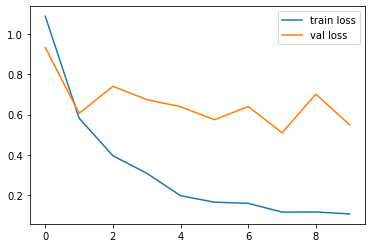

<Figure size 432x288 with 0 Axes>

In [44]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


# Save the model

In [45]:
from tensorflow.keras.models import load_model

model.save('model_building_defects_vgg16.h5')

# Test the model

In [46]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
model = load_model("model_building_defects_vgg16.h5")

In [49]:
img=image.load_img(r'E:\dataset\test_set\flakes\38.jpg',target_size=(224,224))
x=image.img_to_array(img)
#x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
#model.predict(img_data)
a=np.argmax(model.predict(img_data), axis=1)

In [50]:
a

array([1], dtype=int64)

In [51]:
index=['crack','flakes','roof']
result=str(index[a[0]])
result

'flakes'